In [15]:
import pandas as pd 

In [16]:
churn_data = pd.read_csv('data/churn.csv')
churn_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [17]:
import plotly
import plotly.express as px

In [18]:
churn_data['Loyality'] = churn_data['Exited'].apply(lambda x: 'Loyal' if x == 0 else 'Not loyal')

## Задание 9.1

9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

In [19]:
loyality=churn_data['Loyality'].value_counts()
loyality

Loyal        7963
Not loyal    2037
Name: Loyality, dtype: int64

In [20]:
# Построение графика

fig=px.pie(loyality,
    values = loyality,
    names = ['Loyal customers', 'Not loyal customers'],
    title = 'Соотношение лояльных и ушедших клиентов',
    color_discrete_sequence = px.colors.sequential.RdBu
)
fig.update_layout(title = {'font':dict(size=25), 'x':0.45})
fig.show();

Вывод: доля ушедших клиентов равняется примерно 1/5. Около 80% остаются лояльными к банку клиентами. 

## Задание 9.2

In [21]:
churn_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyality
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Not loyal
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Loyal
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Not loyal
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Loyal
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Loyal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Loyal
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Loyal
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Not loyal
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,Not loyal


Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [22]:
import seaborn as sns

In [30]:
# ограничение
mask=churn_data['Balance'] > 2500

In [31]:
# Делаем объект типа Series для построения графика
balance = churn_data[mask]['Balance']
balance.min() # проверяем минимум 

3768.69

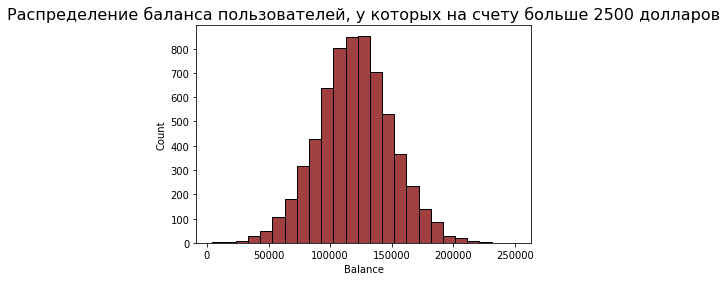

In [32]:
# Строим график.

fig2 = sns.histplot(
    data=balance,
    bins=25,
    color='maroon'
    )
fig2.set_title('Распределение баланса пользователей, у которых на счету больше 2500 долларов', fontsize=16)

fig2;

Вывод: Больше всего клиентов с балансом от 100тыс.дол. до 140тыс.дол. Более чем у 1600 клиентов баланс от 110 до 130 тыс.дол.
До 120 тыс.руб. соотношение кол-ва клиентов и размера боланса увеличиается прямо пропорционально, после 120 тыс.руб. зависимость кол-ва клиентов от размера портфеля - обратная. 

### Задание 9.3

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data_o=churn_data.groupby(['Exited'], as_index=False)[['Balance']].sum()

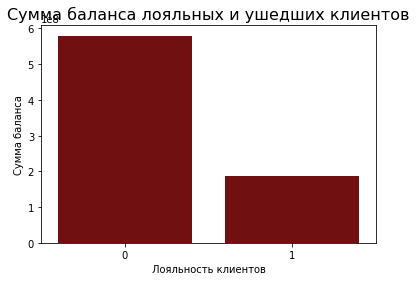

In [28]:
fig3 = sns.barplot(
    data = data_o,
    x = 'Exited',
    y = 'Balance',
    color='maroon'

)

fig3.set_title('Сумма баланса лояльных и ушедших клиентов', fontsize=16);
fig3.set_ylabel('Сумма баланса')
fig3.set_xlabel('Лояльность клиентов');

Вывод: Сумма баланса лояльных клиентов примерно около 600 млн.дол., а сумма баланса ушедших клиентов примерно около 200 млн.руб., т.е. в 3 раза меньше. Это может быть связано с тем, что ушедшие клиенты нашли более выгодные условия хранения своих денежных средств у других банков.

### Задание 9.4

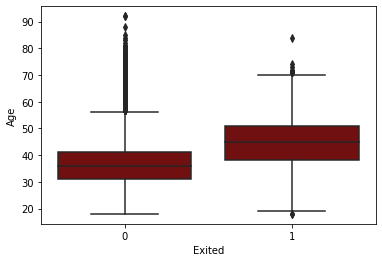

In [29]:
fig4 = sns.boxplot(
    data = churn_data,
    x = 'Exited',
    y = 'Age',
    color='maroon'

)

fig3.set_title('Сумма баланса лояльных и ушедших клиентов', fontsize=16);
fig3.set_ylabel('Сумма баланса')
fig3.set_xlabel('Лояльность клиентов');

Вывод:

### Задание 9.5

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

In [37]:
churn_data['CreditScore'].nunique()


460

In [38]:
churn_data['EstimatedSalary'].nunique()

9999

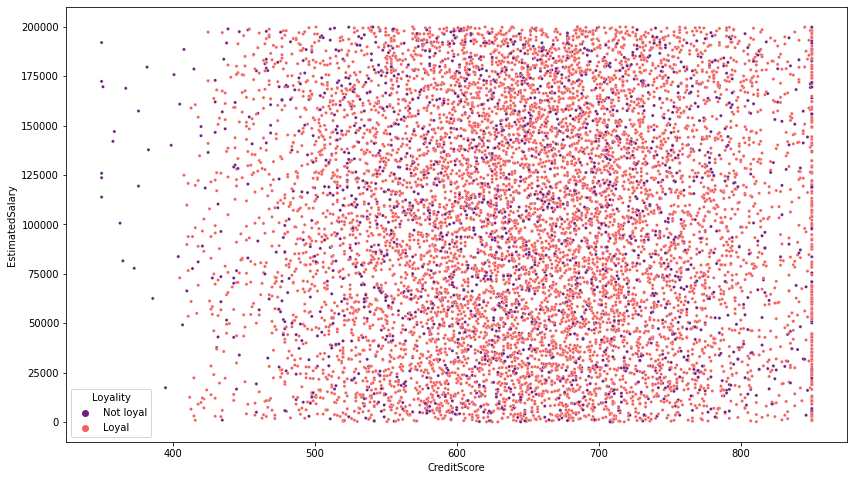

In [59]:
plt.figure(figsize=(14, 8))
rating = sns.scatterplot(data=churn_data,
                         x='CreditScore',
                         y='EstimatedSalary',
                         hue='Loyality',
                         s=10,
                         palette="magma"
)
rating;

Вывод: 